<a href="https://colab.research.google.com/github/leechanwoo-kor/wine-quality-prediction/blob/main/kaggle/Wine_Quality_SVM_%2B_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')  # 그래프 테두리 모두 제거

In [ ]:
# 데이터 불러오기
url = 'https://raw.githubusercontent.com/leechanwoo-kor/wine-quality-prediction/main/kaggle/WineQT.csv'
df = pd.read_csv(url)
del df['Id']
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [ ]:
df.describe()
# 설명변수들의 scale 차이가 크다!
# SVM 이런 scale 차이 큰 데이터에 취약

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


# 데이터 시각화

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# 변수들로 pairplot 그리기
sns.pairplot(df, hue='quality', vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']) 
# vars : list of variable names
    # Variables within ``data`` to use, otherwise use every column with

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


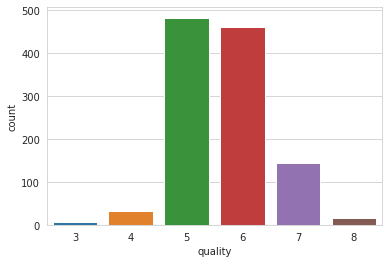

In [ ]:
# target 변수 살펴보기
sns.countplot(df['quality'])

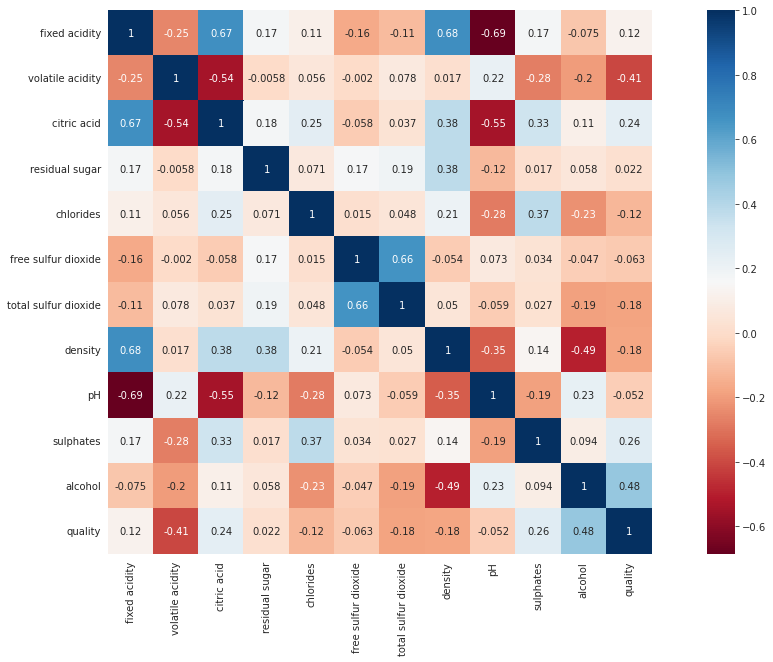

In [ ]:
# 설명변수들(+target 변수) 간의 상관관계
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,square=True,cmap='RdBu') 
# annot=True 데이터 값 셀 안에 적어줌
# square=True 정사각형으로 출력
# Color Brewer 팔레트 중 diverging : Diverging 팔레트는 양쪽으로 강조가 되기 때문에 낮은 값과 높은 값에 모두 관심을 가져야 하는 데이터 세트에 적합.

In [ ]:
#categorize wine quality
bins = (2,6.5,8)
group_names = ['bad','good']
categories = pd.cut(df['quality'], bins, labels = group_names)
df['quality'] = categories

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


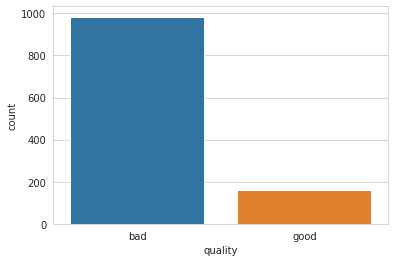

In [ ]:
#target 변수 살펴보기
sns.countplot(df['quality'])

# model training

In [ ]:
from sklearn.model_selection import cross_val_score # k-fold CV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#파이프라인은 여러 변환 단계를 정확한 순서대로 실행할 수 있도록 하는 것입니다. 
# 사이킷런은 연속된 변환을 순서대로 처리할 수 있도록 도와주는 Pipeline 클래스가 있습니다

from sklearn.preprocessing import StandardScaler, MinMaxScaler
# StandardScaler	기본 스케일. 평균과 표준편차 사용
# MinMaxScaler	최대/최소값이 각각 1, 0이 되도록 스케일링

In [ ]:
# 데이터 나누기
X = df.drop('quality', axis=1)
y = df.quality

# Encoding our dependent variable:Quality column
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 11) (343, 11) (800,) (343,)


## SVM

In [ ]:
# linear kernel SVM
from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge', dual=True)
model.fit(X_train,y_train)
# support vector machine의 loss를 hinge라고 함
# squared_hinge는 hinge제곱한값, 보통 그냥 hinge를 자주씀

#  loss : {'hinge', 'squared_hinge'}, default='squared_hinge'
# Specifies the loss function. 'hinge' is the standard SVM loss
# (used e.g. by the SVC class) while 'squared_hinge' is the square of the hinge loss.

# dual : bool, default=True
# Select the algorithm to either solve the dual or primal
# optimization problem. Prefer dual=False when n_samples > n_features.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(loss='hinge')

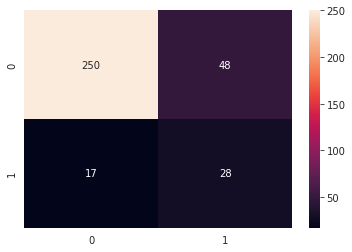

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [ ]:
# LinearSVC의 accuracy
accuracy_score(y_test,y_pred) 

0.8104956268221575

In [ ]:
# linear SVM
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[298,   0],
       [ 45,   0]])

In [ ]:
accuracy_score(y_test,y_pred)

0.8688046647230321

In [ ]:
# polynomial Kernel SVM
# 내 똥컴에서는 너무 느려 기다리지 못했다..
# from sklearn.svm import SVC
# model = SVC(kernel='poly', degree=3, gamma='auto',coef0=1,C=5) # coef0는 kernel이 poly, sigmoid 일때만 유의
# model.fit(X_train, y_train)

# radial Kernel
# model = SVC(kernel='rbf', gamma=0.5, C=0.1)
# model.fit(X_train,y_train)

# SVM을 위한 데이터 준비

- numerical inputs: SVM은 기본적으로 설명변수들이 numeric하다고 가정함 따라서 범주형 변수는 dummy 변수로 변환 필요
- Binary Classification: 기본 SVM은 이항분류, 물론 regression이나 multi-class classification도 가능
- 이 데이터는 위의 두 조건 이미 충족(설명변수 전부 numeric, y도 이항변수임)

In [ ]:
# 설명변수 스케일링
# StandardScaler	기본 스케일. 평균과 표준편차 사용
# MinMaxScaler	최대/최소값이 각각 1, 0이 되도록 스케일링

# pipeline 구축
pipeline = Pipeline([
    ('min_max_scaler',MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

#하지만 테스트 데이터에 scaled_X_test = scaler.fit_transform(X_test)를 적용해서는 안됩니다.
# 이를 수행하면 scaler 객체가 기존에 학습 데이터에 fit 했던 기준을 모두 무시하고 
   # 다시 테스트 데이터를 기반으로 기준을 적용하기 때문입니다. 
#때문에 테스트 데이터에 fit_transform()을 적용해서는 안됩니다.
#이런 번거로움을 피하기 위해 학습과 테스트 데이터로 나누기 전에 먼저 Scaling등의 데이터 전처리를 해주는 것이 좋습니다. 

# 지도 학습 모델에서 테스트 세트를 훈련 세트와 테스트 세트에 같은 변환을 적용해야 한다는 점이 중요!

In [ ]:
X_train 

array([[ 0.92373029,  2.53471034,  0.28849944, ..., -0.42932722,
        -1.05842836, -0.97253583],
       [ 0.44933823, -0.44767421,  1.17119737, ...,  0.2319392 ,
        -0.52330553, -0.69121897],
       [-0.38084788,  5.91099473, -1.37304962, ...,  1.22383882,
        -1.5340931 ,  0.43404847],
       ...,
       [-0.49944589, -1.01038827,  0.34042284, ...,  0.29806584,
        -0.34493126,  1.37177134],
       [-0.20295085,  0.22758267,  0.23657603, ..., -0.16482065,
         0.19019157, -0.87876354],
       [-0.44014688, -0.05377436,  0.7038867 , ..., -0.36320058,
        -0.10709889,  1.27799905]])

In [ ]:
# 데이터 스케일링 한 후 SVM 적용
model = SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[298,   0],
       [ 45,   0]])

In [ ]:
accuracy_score(y_test,y_pred)

0.8688046647230321

# hyperparameter tuning

- 우리가 결정해야 할것: C, gamma, 어떤 kernel 사용

In [ ]:
from sklearn.model_selection import GridSearchCV
# hyperparameter 결정 -> 대부분의 경우 GridSearchCV 이용

In [ ]:
param_grid = {'C': [0.01,0.1,0.5,1,10,100], # default=1.0
             'gamma': [1,0.75,0.5,0.25,0.1,0.01,0.001], # if 'auto', uses 1 / n_features.
             'kernel': ['rbf','poly','linear']}

grid = GridSearchCV(SVC(), param_grid=param_grid,cv=5,refit=True, verbose=1)
# refit=True가 default: 다시 fit해서 best param 찾아주겠다
# verbose: GridSearchCV의 iteration시마다 수행 결과 메시지를 출력합니다.
# verbose=0(default)면 메시지 출력 안함
# verbose=1이면 간단한 메시지 출력
# verbose=2이면 하이퍼 파라미터별 메시지 출력

grid.fit(X_train,y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 100],
                         'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=1)

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}

In [ ]:
svm_clf = SVC(C=1,gamma=0.5,kernel='rbf')
svm_clf.fit(X_train,y_train)

SVC(C=1, gamma=0.5)

0.9037900874635568


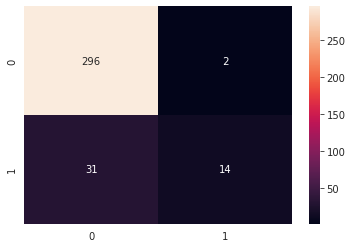

In [ ]:
y_pred = svm_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')
print(accuracy_score(y_pred,y_test))
# -> 예측력 상승

# PCA

In [ ]:
# 데이터 스케일링
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=5)

# pca로 축소한 차원 따로 저장 -> 이거 이용해서 다시 모델링 할것이므로

X_train2 = pca.fit_transform(X_train) # Z1,Z2,Z3,Z4,Z5
X_test2 = pca.transform(X_test)

print(X_train2.shape, X_test2.shape) # 5개의 PC score만 저장된 것 확인

(800, 5) (343, 5)


In [ ]:
X_train.shape

(800, 11)

개념대로 적용하기 (행렬사용)

In [ ]:
pca = PCA()
PCscore_train = pca.fit_transform(X_train)
PCscore_test = pca.transform(X_test)

In [ ]:
eigen_value = pca.explained_variance_
eigen_value.shape

(11,)

In [ ]:
eigen_vector = pca.components_.transpose() # 고유벡터의 전치행렬, eT
# 첫번째 열이 첫번째 고유값으로 만든 고유벡터 e1T
# 두번째 열이 두번째 고유값으로 만든 고유벡터 e2T
# 세번째 열이 세번째 고유값으로 만든 고유벡터 e3T...e30T
eigen_vector.shape

(11, 11)

In [ ]:
np.dot(X_train,eigen_vector)  # pc score, Z1...Z30

array([[ 0.34647942,  4.07048294,  0.228847  , ...,  0.8228781 ,
        -0.21244483,  0.36619945],
       [ 1.15101316,  0.94553975,  0.25271956, ...,  0.32714747,
        -0.22460346, -0.12598545],
       [-3.16043   ,  1.17518812, -3.50574522, ..., -0.14348819,
        -1.13923379,  0.65486997],
       ...,
       [-0.83356743, -1.91686732,  0.64659996, ...,  0.18933649,
         0.11830536, -0.13281657],
       [ 0.1616659 ,  0.61769176, -0.14588261, ...,  1.22807963,
        -0.12149257,  0.09265203],
       [-0.55482042, -1.67856954,  0.4140563 , ...,  0.07570985,
        -0.65744993, -0.34105201]])

In [ ]:
PCscore_train 

array([[ 0.34647942,  4.07048294,  0.228847  , ...,  0.8228781 ,
        -0.21244483,  0.36619945],
       [ 1.15101316,  0.94553975,  0.25271956, ...,  0.32714747,
        -0.22460346, -0.12598545],
       [-3.16043   ,  1.17518812, -3.50574522, ..., -0.14348819,
        -1.13923379,  0.65486997],
       ...,
       [-0.83356743, -1.91686732,  0.64659996, ...,  0.18933649,
         0.11830536, -0.13281657],
       [ 0.1616659 ,  0.61769176, -0.14588261, ...,  1.22807963,
        -0.12149257,  0.09265203],
       [-0.55482042, -1.67856954,  0.4140563 , ...,  0.07570985,
        -0.65744993, -0.34105201]])

In [ ]:
eigen_value = pca.explained_variance_ # 고유값
choose = []
for i in eigen_value:
    a = i/np.sum(eigen_value)
    choose.append(a)
    
choose # Z6부터 값이 확 작아짐 -> Z1,Z2,Z3,Z4,Z5 까지만 선택해도 될듯하다

[0.28394495521641383,
 0.17614014678865264,
 0.1448706279639167,
 0.10578762950734551,
 0.09051891608889975,
 0.058563992418424755,
 0.049627675956969125,
 0.037060145513336966,
 0.03141560783493046,
 0.016755911167047197,
 0.005314391544063012]

- PCA 시각화

Text(0, 0.5, '두번째 주성분')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_

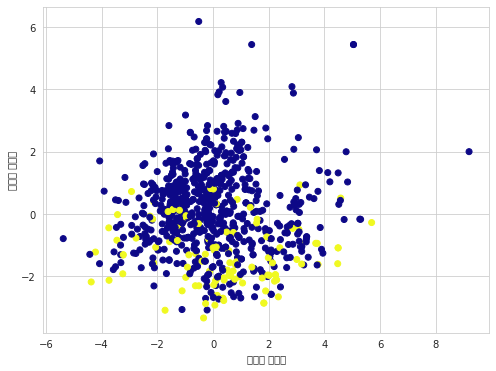

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_train2[:,0],X_train2[:,1],c=y_train,cmap='plasma')
plt.xlabel('첫번째 주성분')
plt.ylabel('두번째 주성분')

# 이제 주성분만을 사용해서 다시 SVM을 해보자!

In [ ]:
# hyperparameter tuning
param_grid = {'C': [0.1,0.5,1,5,10,100],
             'gamma': [1,0.5,0.25,0.1,],
             'kernel': ['rbf','poly','linear']}

grid = GridSearchCV(SVC(),param_grid=param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train2,y_train)

print(grid.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'C': 1, 'gamma': 0.25, 'kernel': 'rbf'}


In [ ]:
# 모델 적합
svm_clf2 = SVC(C=1,gamma=0.75,kernel='poly')
svm_clf2.fit(X_train2,y_train)

SVC(C=1, gamma=0.75, kernel='poly')

In [ ]:
# 예측력 확인
y_pred = svm_clf2.predict(X_test2)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

# 5개의 변수(Z1,Z2,Z3,Z4,Z5)만으로 높은 예측력 가능

[[288  10]
 [ 26  19]]
0.8950437317784257
